In [1]:
import os, shutil

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [6]:
from tensorflow.keras import optimizers

In [3]:
base_dir = "/content/drive/MyDrive/cats_and_dogs_small"

In [4]:
train_dir = "/content/drive/MyDrive/cats_and_dogs_small/train"
validation_dir = "/content/drive/MyDrive/cats_and_dogs_small/validation"
test_dir = "/content/drive/MyDrive/cats_and_dogs_small/test"

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer= optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2003 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data_batch_shape:', data_batch.shape)
  print('labels_batch_shape:', labels_batch.shape)
  break


data_batch_shape: (20, 150, 150, 3)
labels_batch_shape: (20,)


In [ ]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 595s 6s/step - loss: 0.6897 - acc: 0.5275 - val_loss: 0.6722 - val_acc: 0.6330
Epoch 2/30
100/100 [==============================] - 16s 160ms/step - loss: 0.6643 - acc: 0.5996 - val_loss: 0.6482 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 16s 162ms/step - loss: 0.6274 - acc: 0.6480 - val_loss: 0.6207 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 16s 160ms/step - loss: 0.5830 - acc: 0.7040 - val_loss: 0.5872 - val_acc: 0.6930
Epoch 5/30
100/100 [==============================] - 16s 162ms/step - loss: 0.5491 - acc: 0.7085 - val_loss: 0.5826 - val_acc: 0.7030
Epoch 6/30
100/100 [==============================] - 16s 159ms/step - loss: 0.5148 - acc: 0.7489 - val_loss: 0.5750 - val_acc: 0.6860
Epoch 7/30
100/100 [==============================] - 16s 158ms/step - loss: 0.4895 - acc: 0.7675 - val_loss: 0.5509 - val_acc: 0.7200
Epoch 8/30
100/100 [==============================] - 16s

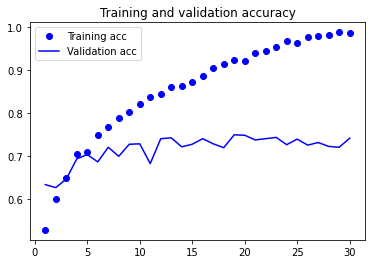

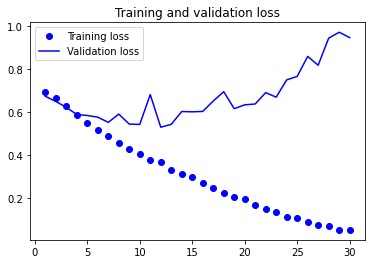

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs= 50,
      validation_data=validation_generator,
      validation_steps=10)


Found 2003 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
50/50 [==============================] - 18s 359ms/step - loss: 0.6880 - acc: 0.5249 - val_loss: 0.6771 - val_acc: 0.5813
Epoch 2/50
50/50 [==============================] - 18s 356ms/step - loss: 0.6792 - acc: 0.5551 - val_loss: 0.6659 - val_acc: 0.5813
Epoch 3/50
50/50 [==============================] - 18s 358ms/step - loss: 0.6781 - acc: 0.5709 - val_loss: 0.6633 - val_acc: 0.5594
Epoch 4/50
50/50 [==============================] - 18s 354ms/step - loss: 0.6740 - acc: 0.5734 - val_loss: 0.6482 - val_acc: 0.6125
Epoch 5/50
50/50 [==============================] - 18s 358ms/step - loss: 0.6667 - acc: 0.5955 - val_loss: 0.6406 - val_acc: 0.6156
Epoch 6/50
50/50 [==============================] - 18s 363ms/step - loss: 0.6649 - acc: 0.5898 - val_loss: 0.6311 - val_acc: 0.6219
Epoch 7/50
50/50 [==============================] - 18s 358ms/step - loss: 0.6592 - acc: 0.6055 - val_loss: 0.6095 - val_acc: 0.6781
Epoch 8/50
50/50 [==============================] - 18s 361ms/step - 

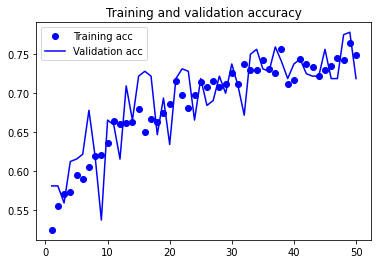

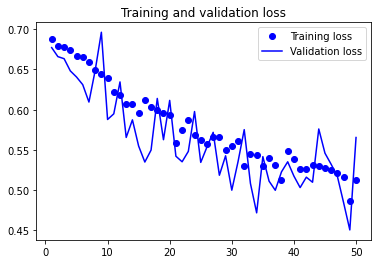

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2003 images belonging to 2 classes.


KeyboardInterrupt: ignored

In [ ]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.6087 - acc: 0.6640 - val_loss: 0.4373 - val_acc: 0.8240
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 0.4173 - acc: 0.8210 - val_loss: 0.3568 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3596 - acc: 0.8520 - val_loss: 0.3270 - val_acc: 0.8640
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3184 - acc: 0.8570 - val_loss: 0.3028 - val_acc: 0.8710
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2917 - acc: 0.8800 - val_loss: 0.2810 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2637 - acc: 0.8935 - val_loss: 0.2720 - val_acc: 0.8920
Epoch 7/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2447 - acc: 0.9005 - val_loss: 0.2632 - val_acc: 0.8970
Epoch 8/30
100/100 [==============================] - 1s 6ms/step - loss: 0.

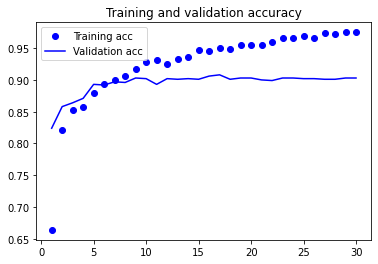

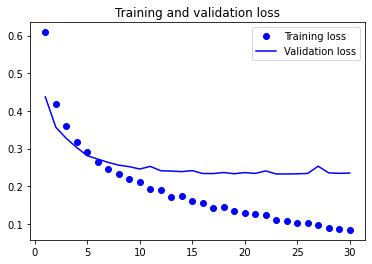

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [14]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [15]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])


Found 2003 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 31s 305ms/step - loss: 0.5890 - acc: 0.6949 - val_loss: 0.4516 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 29s 292ms/step - loss: 0.4897 - acc: 0.7726 - val_loss: 0.3677 - val_acc: 0.8730
Epoch 3/30
100/100 [==============================] - 29s 287ms/step - loss: 0.4379 - acc: 0.8089 - val_loss: 0.3268 - val_acc: 0.8770
Epoch 4/30
100/100 [==============================] - 29s 286ms/step - loss: 0.4067 - acc: 0.8265 - val_loss: 0.3056 - val_acc: 0.8780
Epoch 5/30
100/100 [==============================] - 29s 287ms/step - loss: 0.3841 - acc: 0.8336 - val_loss: 0.2903 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 29s 289ms/step - loss: 0.3760 - acc: 0.8401 - val_loss: 0.2808 - val_acc: 0.8790
Epoch 7/30
100/100 [==============================] - 29s 292ms/step - loss: 0.3555 - acc: 0.8497 - val_loss: 0.2834 - val_acc: 0.8860
Epoch 8/30
100/100 [==============================] - 2

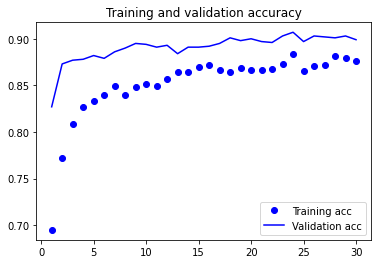

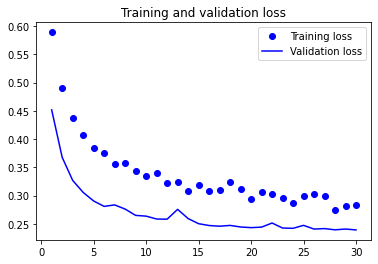

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [11]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2003 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

100/100 [==============================] - 31s 306ms/step - loss: 0.0493 - acc: 0.9783 - val_loss: 0.2038 - val_acc: 0.9410
Epoch 59/100
 39/100 [==========>...................] - ETA: 14s - loss: 0.0399 - acc: 0.9895

KeyboardInterrupt: ignored